In [23]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv('../datastore/training/FPL_data_24_25.csv')
print(dataset.head(10))
print(dataset.shape) #407, 13

           name  price     team  goals  assists  goal_contributions  \
0          Raya    5.5  Arsenal      0        0                   0   
1  Arrizabalaga    4.5  Arsenal      0        0                   0   
2          Hein    4.0  Arsenal      0        0                   0   
3       Setford    4.0  Arsenal      0        0                   0   
4       Gabriel    6.0  Arsenal      3        2                   5   
5        Saliba    6.0  Arsenal      2        0                   2   
6     Calafiori    5.5  Arsenal      2        1                   3   
7      J.Timber    5.5  Arsenal      1        3                   4   
8        Kiwior    5.5  Arsenal      1        0                   1   
9  Lewis-Skelly    5.5  Arsenal      1        0                   1   

   games_played  minutes  total_points  points_per_game     roi position  \
0            38     3420           142              3.7  25.820       GK   
1            31     2790           106              3.4  23.560   

In [24]:
data = dataset.sample(frac=0.85, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (582, 13)
Unseen Data For Predictions: (103, 13)


In [25]:
from pycaret.regression import *
s = setup(data = data, target = 'roi', session_id=7177, ignore_features=['name'])
print(s)

In [26]:
best = compare_models()


Initiated  . . . . . . . . . . . . . . . . . .              01:06:09
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

In [27]:
lightgbm = create_model('lightgbm')

Initiated  . . . . . . . . . . . . . . . . . .              01:06:20
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

In [28]:
tuned_lightgbm = tune_model(lightgbm)

Initiated  . . . . . . . . . . . . . . . . . .              01:06:22
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


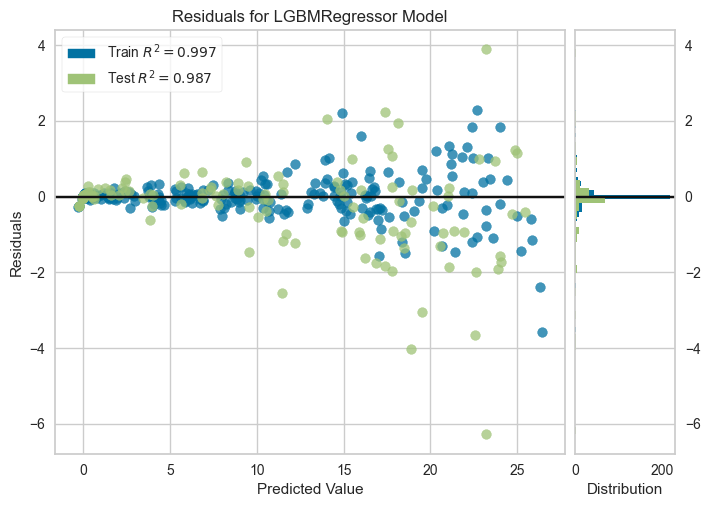

In [29]:
plot_model(tuned_lightgbm)

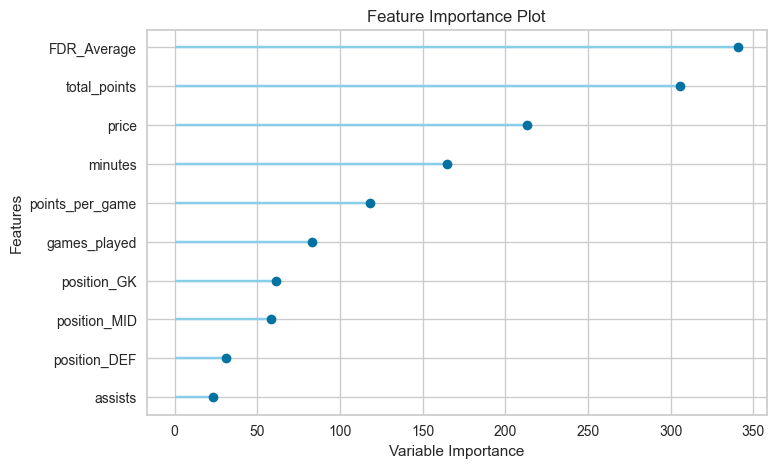

In [30]:
plot_model(tuned_lightgbm, plot='feature')

In [31]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [32]:
print(final_lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['price', 'goals', 'assists',
                                             'goal_contributions',
                                             'games_played', 'minutes',
                                             'total_points', 'points_per_game',
                                             'FDR_Average'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['team', 'position'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['team', 'position'],
                                    transformer=OneHotEncoder(cols=['team',
                                                                    'position'],
                                              

In [33]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head(100)

name  price      team  goals  assists  goal_contributions  \
0         Setford    4.0   Arsenal      0        0                   0   
1          Saliba    6.0   Arsenal      2        0                   2   
2        J.Timber    5.5   Arsenal      1        3                   4   
3         Kacurri    4.0   Arsenal      0        0                   0   
4         Nichols    4.0   Arsenal      0        0                   0   
..            ...    ...       ...    ...      ...                 ...   
95  Walker-Peters    4.5  West Ham      0        0                   0   
96        José Sá    4.5    Wolves      0        0                   0   
97        Agbadou    4.5    Wolves      1        0                   1   
98        R.Gomes    4.5    Wolves      2        0                   2   
99      Fer López    5.5    Wolves      0        0                   0   

    games_played  minutes  total_points  points_per_game position  \
0              0        0             0              0.0       GK   
1             35     3039           130              3.7      DEF   
2             27     2415           114              3.8      DEF   
3              0        0             0              0.0      DEF   
4              0        0             0              0.0      DEF   
..           ...      ...           ...              ...      ...   
95             0        0             0              0.0      DEF   
96            29     2610            93              3.2       GK   
97            16     1410            45              2.8      DEF   
98             7      794            42              1.7      DEF   
99             0        0             0              0.0      MID   

    FDR_Average     roi  prediction_label  
0      7.596491   0.000          0.048346  
1      7.596491  21.670         22.877695  
2      7.596491  20.730         19.650600  
3      7.596491   0.000          0.030002  
4      7.596491   0.000          0.030002  
..          ...     ...               ...  
95    -3.280702   0.000         -0.003076  
96    -3.631579  20.670         20.169001  
97    -3.631579  10.000         10.090497  
98    -3.631579   9.333          8.274172  
99    -3.631579   0.000          0.019730  

[100 rows x 14 columns]

In [34]:
save_model(final_lightgbm,'Final Lightgbm Model ROI-Target')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['price', 'goals', 'assists',
                                              'goal_contributions',
                                              'games_played', 'minutes',
                                              'total_points', 'points_per_game',
                                              'FDR_Average'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['team', 'position'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['team', 'position'],
                                     transformer=OneHotEncoder(cols=['team',
                                                                     'position'],
                               

In [35]:

saved_final_lightgbm = load_model('Final Lightgbm Model ROI-Target')

data_new = pd.read_csv('../datastore/current/FPL_data_3.csv')
new_prediction = predict_model(saved_final_lightgbm, data=data_new).sort_values('prediction_label', ascending=False)
new_prediction.head(100)

Transformation Pipeline and Model Successfully Loaded


name  price  games_played  goals  assists  goal_contributions  \
6    Calafiori    5.6             2      1        2                   3   
7     J.Timber    5.6             1      2        1                   3   
568    Ballard    4.6             2      1        0                   1   
607    Vicario    5.0             2      0        0                   0   
95      Cullen    5.0             2      1        1                   2   
..         ...    ...           ...    ...      ...                 ...   
120      Smith    4.5             2      0        0                   0   
569       Hume    4.5             2      0        0                   0   
605   Alderete    4.0             1      0        1                   1   
121   Truffert    4.5             2      0        0                   0   
424    Ngumoha    4.5             0      1        0                   1   

     total_points  points_per_game position         team  minutes  \
6              26             13.0      DEF      Arsenal      134   
7              24             12.0      DEF      Arsenal       82   
568            18              9.0      DEF   Sunderland       98   
607            18              9.0       GK        Spurs      180   
95             18              9.0      MID      Burnley      180   
..            ...              ...      ...          ...      ...   
120             7              3.5      DEF  Bournemouth      179   
569             7              3.5      DEF   Sunderland      180   
605             5              2.5      DEF   Sunderland      127   
121             6              3.0      DEF  Bournemouth      180   
424             6              6.0      MID    Liverpool        1   

     FDR_Average    roi  prediction_label  
6          0.070  4.643          5.127292  
7          0.070  4.286          4.376381  
568        0.026  3.913          4.137571  
607        0.053  3.600          3.949706  
95        -0.026  3.600          3.863151  
..           ...    ...               ...  
120        0.000  1.556          1.577649  
569        0.026  1.556          1.577649  
605        0.026  1.250          1.548544  
121        0.000  1.333          1.537545  
424        0.070  1.333          1.530928  

[100 rows x 14 columns]